<a href="https://colab.research.google.com/github/veroggg79/AMORTIZATIONS/blob/main/section8_stochastic_and_economic_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 8: Procesos estocásticos y económicos

Supongamos que tenemos una cantidad X que depende del tiempo. Y hacemos diariamente mediciones de dicha cantidad. Supongamos que cada vez que hacemos la medida y graficamos los puntos a lo largo del día como una función X(t) obtenemos curvas distintas, es decir, hay aleatoriedad en los datos. Esta familia de datos que obtenemos de procesos aleatorios es lo que se llama un proceso estocástico.


 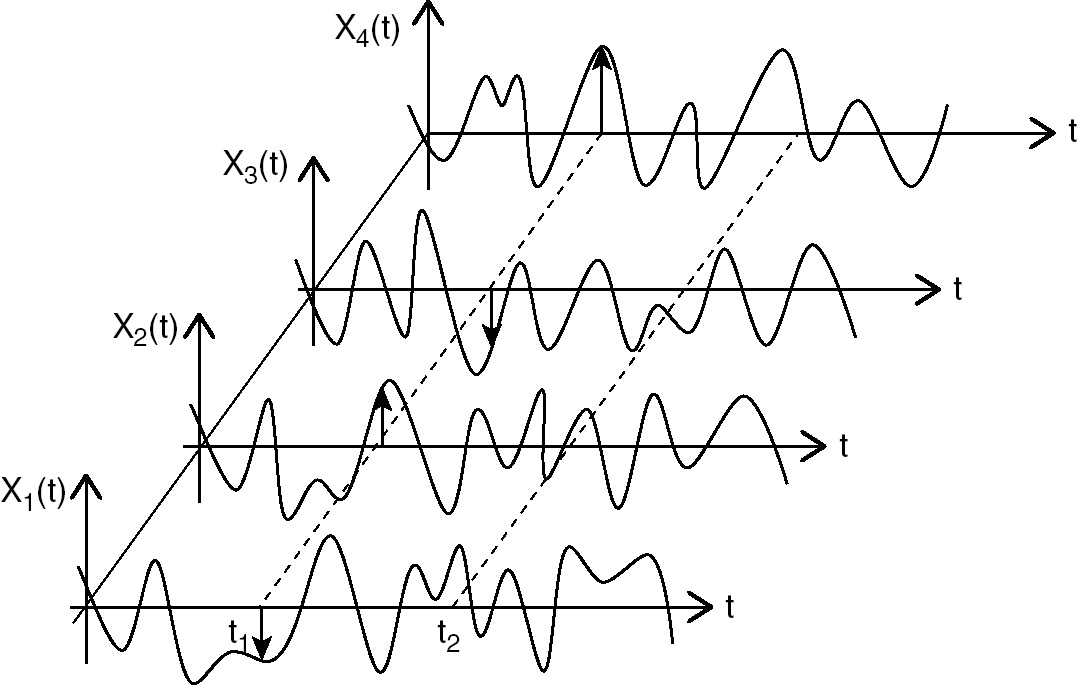

# 8.1. Algunas aplicaciones económicas y financieras de los procesos estocásticos

- Modelos de precio de acciones
- Modelos de comportamiento de consumidores
- Modelos de toma de decisiones
- Fluctuaciones en cambios de las divisas
- Pronósticos de demanda de energía

# 8.2. Camino Aleatorio (Random Walk)

Es un proceso estocástico también llamado la caminata del borracho, resulta de hacer sucesivos pasos aleatorios. Para entender esto, supongamos que tenemos un sistema que solo tiene dos opciones de movimiento: -1 y +1 cada uno con cierta probabilidad. Y que cada medición la vamos a hacer en un tiempo t.
El posible resultado de éste proceso puede dar origen a múltiples curvas, lo que describe un proceso estocástico.

# Distribución del camino aleatorio
La distribución de los valores finales del camino aleatorio es una distribución normal y sus incrementos son independientes, no dependen del paso anterior sino que están determinados completamente en el tiempo t.

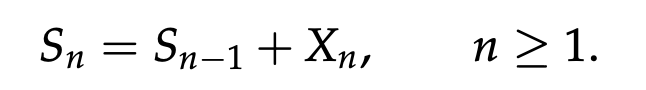

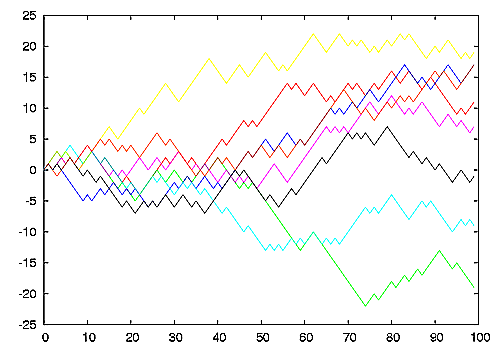

# 8.2.1. Implementación de caminos aleatorios en Python

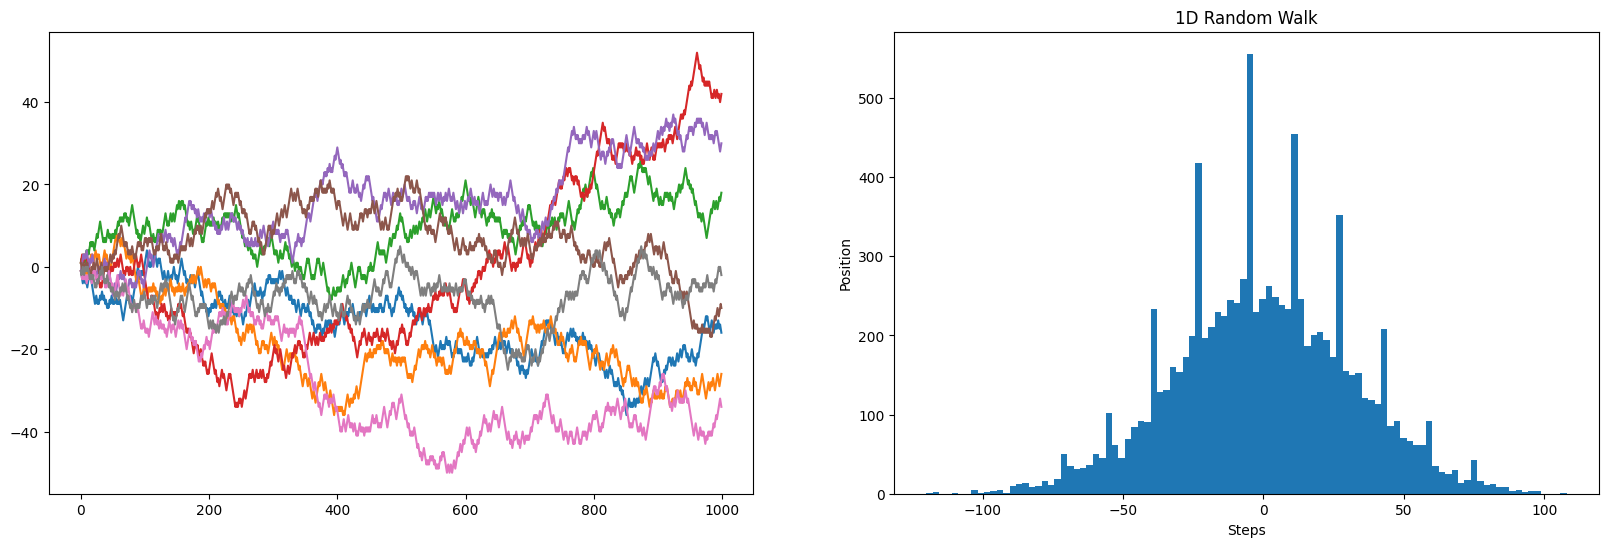

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(n: int) -> np.ndarray:
    steps = np.random.choice([-1, 1], size=n)
    positions = np.cumsum(steps)
    return positions

number_of_steps = 1000
number_of_walks = 10000

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.title("1D Random Walk")
plt.xlabel("Steps")
plt.ylabel("Position")

distribution = []

for i in range(1, number_of_walks):
    positions = random_walk(number_of_steps)
    distribution.append(positions[-1])
    if (i <= 8):
        axes[0].plot(positions)

axes[1].hist(distribution, bins=int(np.sqrt(number_of_walks)))

plt.show()

# 8.3. Proceso de Wiener o Movimiento Browniano

Es un proceso estocástico, que es la generalización o extensión del camino aleatorio para variables continuas. Está normalmente distribuído, con media 0 y la varianza como el cambio en la variable independiente. Sus incrementos deben ser independientes, es decir, no dependen del paso anterior y están completamente determinados en el tiempo t.

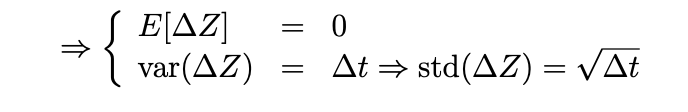

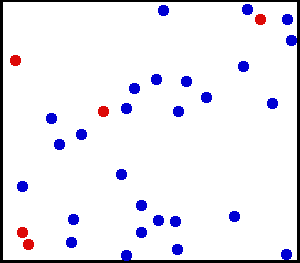

# 8.3.1. Implementación de procesos de Wiener en Python

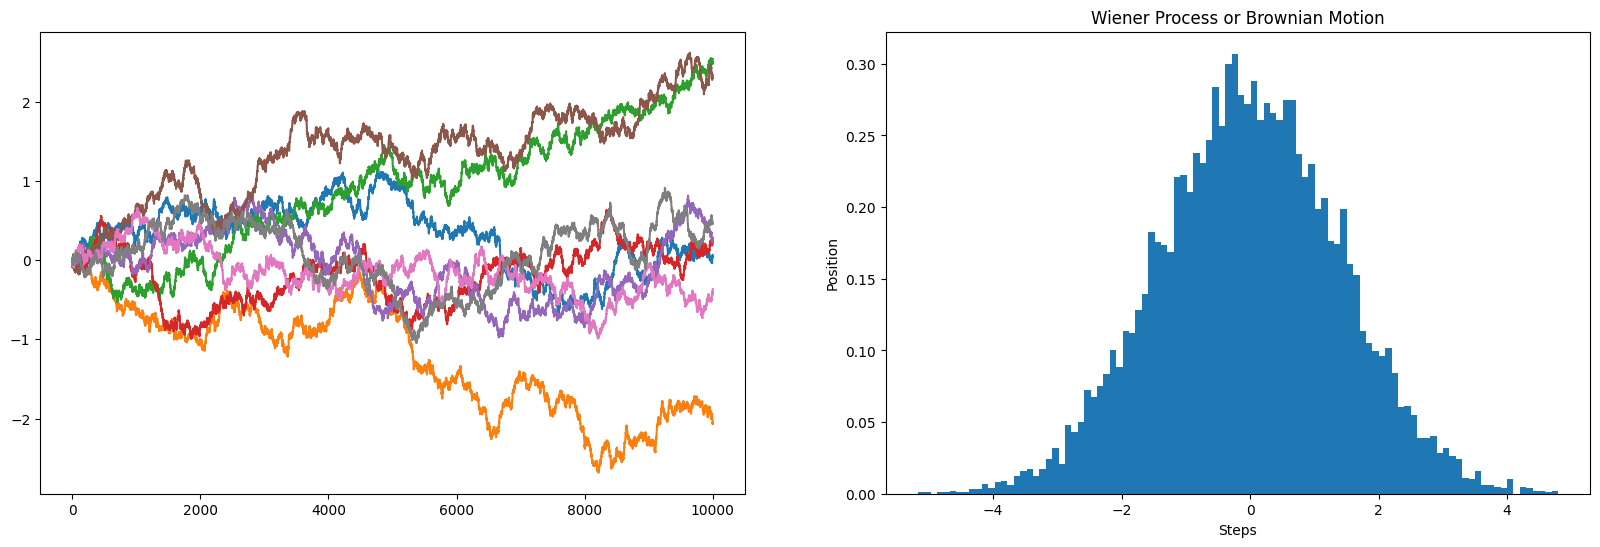

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def wiener_process(x0: float, n: int, t: float) -> np.ndarray:
    dt = t / n
    steps = np.random.normal(0, np.sqrt(dt), size=n)
    positions = np.cumsum(steps)
    return positions

number_of_steps = 10000
number_of_walks = 10000
t = 2

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.title("Wiener Process or Brownian Motion")
plt.xlabel("Steps")
plt.ylabel("Position")

distribution = []

for i in range(1, number_of_walks):
    positions = wiener_process(0, number_of_steps, t)
    distribution.append(positions[-1])
    if (i <= 8):
        axes[0].plot(positions)

axes[1].hist(distribution, bins=int(np.sqrt(number_of_walks)), density=True)

plt.show()

# 8.4. Modelar precios de activos o acciones

Cuando observamos las gráficas de series de tiempo de precios de activos o de cómo cambian los precios de las acciones, podemos ver similaridades entre éstas y las gráficas generadas por los caminos aleatorios. Esto parece indicar que podríamos modelar estos precios por medio de procesos estocásticos.

# 8.4.1. Ejemplo: Índice S&P 500

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spdata = pd.read_csv("s&p-index.csv", parse_dates=["Date"], index_col="Date")
sp500 = spdata["2007": "2017"]["SP500"].to_frame()
sp500

,SP500
Date,
2007-01-01,1424.16
2007-02-01,1444.80
2007-03-01,1406.95
2007-04-01,1463.64
2007-05-01,1511.14
...,...
2017-08-01,2456.22
2017-09-01,2492.84
2017-10-01,2557.00


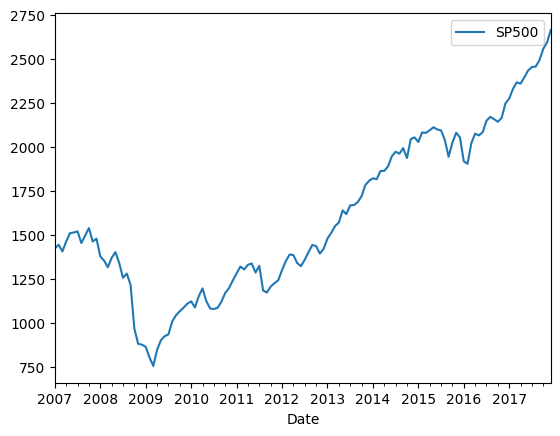

In [ ]:
sp500.plot()
plt.show()

# 8.4.2. Ejemplo: Retornos del Índice S&P 500

![image.png](
)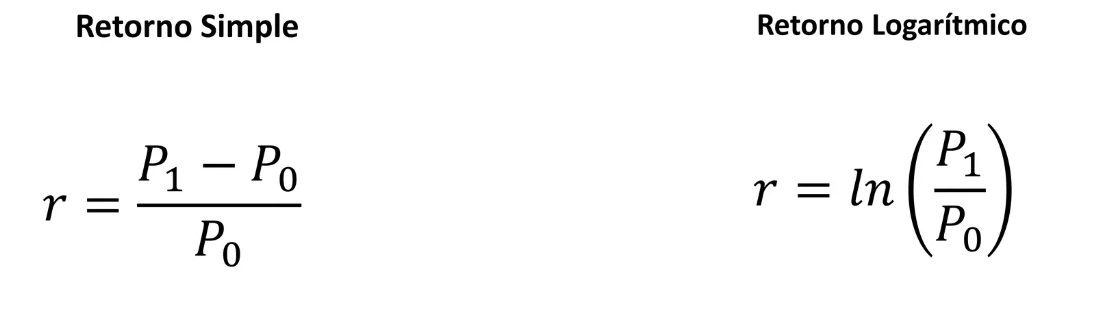

              SP500  simple-returns
Date                               
2007-01-01  1424.16             NaN
2007-02-01  1444.80        0.014493
2007-03-01  1406.95       -0.026197
2007-04-01  1463.64        0.040293
2007-05-01  1511.14        0.032453
...             ...             ...
2017-08-01  2456.22        0.000864
2017-09-01  2492.84        0.014909
2017-10-01  2557.00        0.025738
2017-11-01  2593.61        0.014318
2017-12-01  2664.34        0.027271

[132 rows x 2 columns]


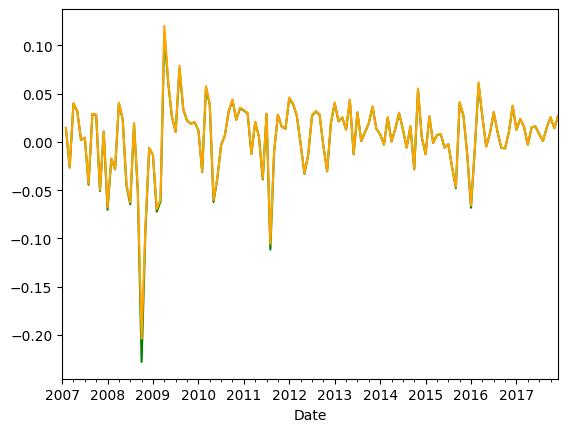

In [ ]:
# Retornos simples
sp500["simple-returns"] = sp500["SP500"].pct_change()
print(sp500)

# Retornos logarítmicos
sp500["log-returns"] = np.log(sp500["SP500"] / sp500["SP500"].shift(1))

sp500["log-returns"].plot(color="green")
sp500["simple-returns"].plot(color="orange")
plt.show()

# 8.4.3. Ejemplo: Histórico de la libra esterlina frente al dólar

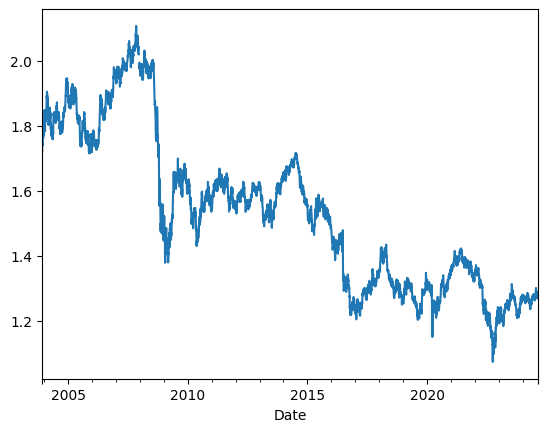

In [ ]:
import pandas as pd

gbpusd = pd.read_csv("GBPUSD=X.csv", parse_dates=["Date"], index_col="Date")
gbpusd["Close"].plot()
plt.show()

# 8.5. Movimiento Browniano Geométrico

Es un proceso estocástico, que está basado en una transformación exponencial del movimiento browniano, para así ajustar la tendencia de los incrementos y asegurar la no-negatividad de los resultados. Se modela el logaritmo de la variable independiente, lo que causa que la distribución sea log-normal.

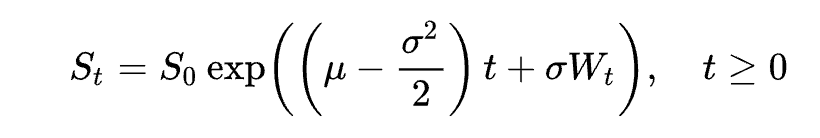

# 8.3.1. Implementación del movimiento Browniano Geométrico en Python

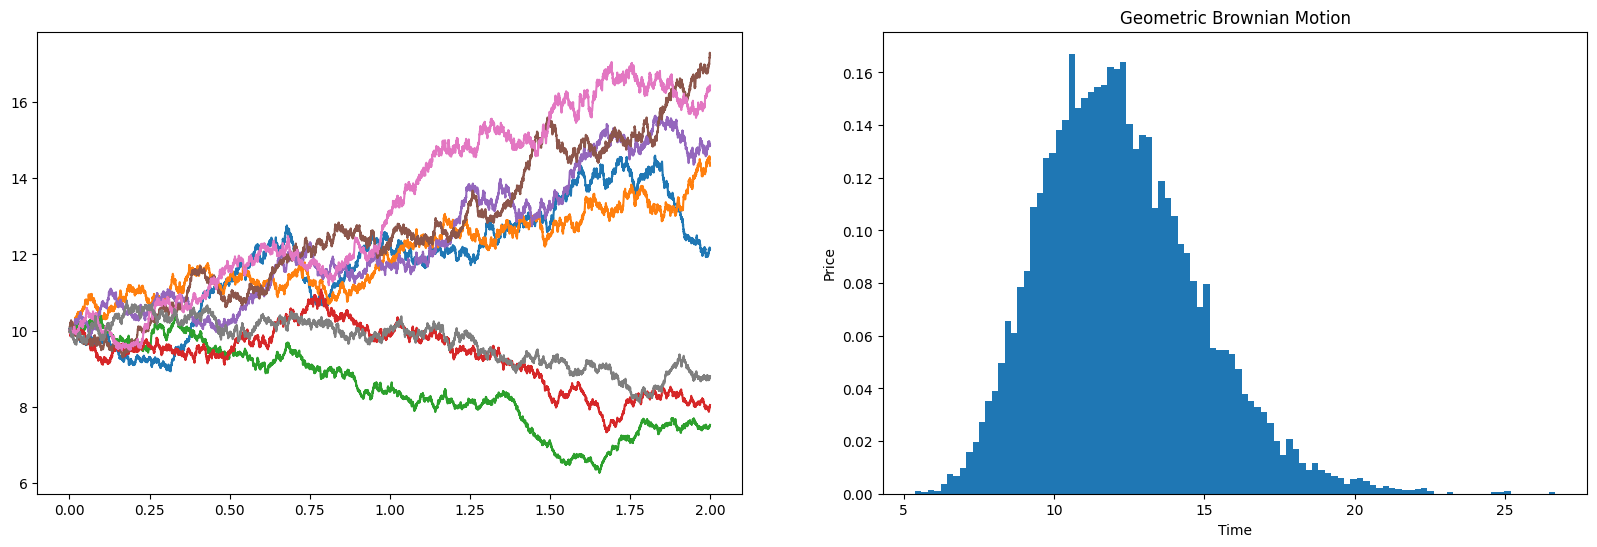

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion(S0: float, t: float, n: int = 1000, mu: float = 0.1, sigma: float = 0.15) -> np.ndarray:
    dt = t / n
    t = np.linspace(0, t, n)
    # Weiner steps
    w_steps = np.random.normal(0, 1, size=n)
    w_positions = np.cumsum(w_steps) * np.sqrt(dt)
    S = S0 * np.exp((mu - sigma ** 2 / 2) * t + sigma * w_positions)
    return t, S

number_of_steps = 10000
number_of_paths = 10000
t = 2
s0 = 10

fix, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.title("Geometric Brownian Motion")
plt.xlabel("Time")
plt.ylabel("Price")

distribution = []

for i in range(1, number_of_paths):
    time, values = geometric_brownian_motion(s0, 2, number_of_steps)
    distribution.append(values[-1])
    if (i <= 8):
        axes[0].plot(time, values)

axes[1].hist(distribution, bins=int(np.sqrt(number_of_paths)), density=True)

plt.show()